In [1]:
!pip install sympy
!pip install numpy
!pip install scipy
!pip install control

# Bibliotecas

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import sympy as sp
from sympy import Eq, Poly, exp
from sympy import fraction
from sympy.abc import s,t
import sympy as sp
import numpy as np
import scipy as scp
from scipy import signal
from control import tf
from scipy.stats import pearsonr
import datetime
import scipy.signal as signal
import numpy as np
import random
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.1 MB/s eta 0:00:00


In [2]:
inicio = datetime.datetime.now()

#declaração variaveis

tau_1, tau_2, Vo, Vi   = sp.symbols('tau_1 tau_2 Vo Vi')
C0, C1, C2, C3, C4  = sp.symbols('C0 C1 C2 C3 C4 ')
R0, R1, R2  = sp.symbols('R0 R1 R2')
L1, L2, L3 = sp.symbols('L1 L2 L3')
I1, I2, I3, I4, I5, I6  = sp.symbols('I1 I2 I3 I4 I5 I6')

# Limite do plot com 400 pontos com distancia de 25*10^-9 entre eles
t1 = np.arange(0, 400) * 25 * 10**-9 # usado para todos os termos

# componentes do ckt
Cord = [C0, C1, C2, C3, C4, L1, L2, L3, R0, R1, R2, tau_1, tau_2]
Cval0 = [101e-9, 5e-12, 138e-12, 102e-12, 6.8e-12, 2.48e-6, 1.6e-6,
            0.78e-6, 1.1e3, 75, 49.9, 3.1046e-09, 6.5798e-09] # valores exatos do Cord em ordem

# componentes do plot
y = [] # lista de todos o so graficos somados com erros
xa = [] # lista das FP a serem somadas pro grafico
y1 = [] # aux
tds_polos = [] # salvando os polos
p3 = 0 # parametro de repetiçao seno e cosseno

# lista com valor medio de todos os valores de y
ymed = []

# desvio padrao dos valores de y e de ymed
desv_pad = []

# parte real e imagianria para mapa dos polos
real_part = []
imag_part = []

# funçao Laplace
def laplace(f):
    return sp.laplace_transform(f, t, s, noconds=True)

# equações do ckt
eqn1 = Eq( 1/(C1*s)*(I1-I2) + 1/(C0*s)*I1 , Vi)
eqn2 = Eq( 1/(C1*s)*(I2-I1) + s*L1*I2 + 1/(C2*s)*(I2-I3) , 0)
eqn3 = Eq( 1/(C2*s)*(I3-I2) + s*L2*I3 + 1/(C3*s)*(I3-I4) , 0)
eqn4 = Eq( 1/(C3*s)*(I4-I3) + s*L3*I4 + 1/(C4*s)*(I4-I5) , 0)
eqn5 = Eq( 1/(C4*s)*(I5-I4) + (I5-I6)*R0 , 0)
eqn6 = Eq( R0*(I6-I5) + R1*I6 + R2*I6 , 0)
eqn7 = Eq( I6*R2, Vo )
eqns = [eqn1, eqn2, eqn3, eqn4, eqn5, eqn6, eqn7]

# soluçao do ckt
Sol = sp.solve( eqns, (I1, I2, I3, I4, I5, I6, Vo) )
si6 = Sol[I6]

# saida tirando a entrada
h = R2*si6/Vi

# PMT
V = (1/tau_1-1/tau_2)/(s**2+(1/tau_1+1/tau_2)*s+1/tau_1/tau_2)

# função trasferencia final
H1 = -V * h

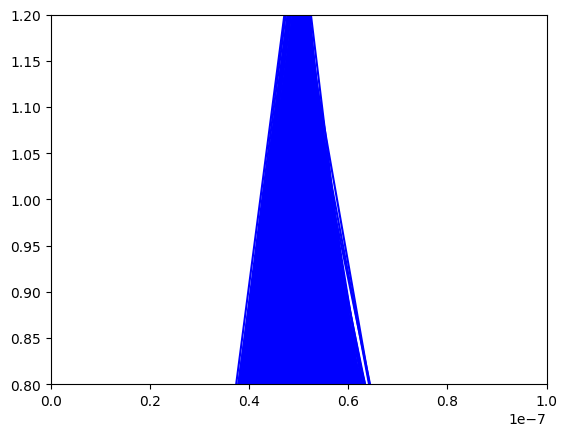

0.03751793324895688

[1.0,
 1.1455568713725717,
 1.1368190483483782,
 0.9847020470778878,
 0.9701673370419631,
 0.9758050803161864,
 1.0413504783338898,
 1.158082647084627,
 1.0913065447432746,
 0.9099458436555226,
 0.9288376001372942,
 0.8925078947419217,
 1.234110559752388,
 0.8258745291665198,
 1.2737120542603964,
 1.0238019229499358,
 0.9103217685238216,
 0.8099786000619844,
 0.9672903104272019,
 1.0617441178364522,
 0.996449643430846,
 1.0308761503459427,
 1.0889683344834238,
 1.1159627633268685,
 1.0407271714009743,
 0.9044101811625943,
 1.1500497524651059,
 1.1596458555288285,
 0.990456550072145,
 0.7997910642548702,
 1.0169412120203716,
 1.0518804182932944,
 0.9119406333381104,
 0.7609958406052584,
 1.073416993377644,
 1.0463540943365761,
 1.042428958454024,
 1.0202670640801266,
 1.0215854927912236,
 1.1264091656385649,
 1.1216581202008273,
 0.8432590218092937,
 1.1607618080171154,
 1.0705558074776607,
 1.0918943314484417,
 1.0493533635320316,
 1.1142670278752957,
 0.8506323103873048,
 1.0194137318

In [3]:
# quantidade de vezes q o loop vai rodar
e = 0.1 # erro
# Cord = [C0, C1, C2, C3, C4, L1, L2, L3, R0, R1, R2, tau_1, tau_2]
percents = [e, e, e, e, e, e, e, e, e, e, e, 0, 0]
vezes = 1500 # pra valer: 1500
MC    = []
Amp   = []
y     = []
tds_polos = []

for i in range(0, vezes):

    Cval0 = [101e-9, 5e-12, 138e-12, 102e-12, 6.8e-12, 2.48e-6, 1.6e-6,
            0.78e-6, 1.1e3, 75, 49.9, 3.1046e-09, 6.5798e-09] # valores exatos do Cord em ordem

    # valores aleatorios
    # range d erro; erro máximo de -e% ate +e%
    xa   = []
    Cval = [] # lista d componentes com valores alterados
    aux  = 0

    for valor, erro in zip(Cval0, percents):

        if erro == 0:
            variacao = 0
        else:
            variacao = (random.gauss(0, erro))

        aux = valor * variacao + valor
        # lista com valores alterados
        Cval.append(aux) # valores de Cval com erro/variação de +-e%

    if i == 0: # valor do sinal real/sem erros
        Cval = Cval0

    MC.append(Cval[0:11])

    # função trasferencia
    H = -H1

    # Substituição de valores
    for variavel, valor1 in zip(Cord, Cval):
        H = H.subs(variavel, valor1)

    # Separando numerador dedenominador
    N_H, D_H = fraction(H)

    '''RESIDUOS E POLOS'''

    # Coeficientes do numerador e denominador

    coefs_num = [] # limpando a variavel
    coefs_den = [] # limpando a variavel

    coefs_num = sp.Poly(N_H, s).all_coeffs()
    coefs_den = sp.Poly(D_H, s).all_coeffs()

    # frações parciais
    residuo, polo, b0 = [], [], [] # 'zerando' variavel

    residuo, polo, b0 = signal.residue(coefs_num, coefs_den)

    # salvando todos os polos
    tds_polos.append(polo)

    # Correção do residuo (tirando a parte img dos residuos reais)
    for j in range(0, len(polo)):
        if polo[j].imag == 0:
            residuo[j] = residuo[j].real

    '''LAPLACE INVERSA E GRAFICOS'''

    for k in range (0, len(polo)):
        if polo[k].imag == 0:
            residuo[k] = residuo[k].real
            polo[k] = polo[k].real

        # Verifique se a parte imaginária esta zerada
        if polo[k].imag == 0:

            'EXPONENCIAIS'

            A = residuo[k] # ganho
            d = polo[k] # taxa d decaimento
            x = A * np.exp(d * t1)

            xa.append(x)

        else:
            'Senos e cossenos'

            pol = polo[k]
            pol_1 = polo[k-1] #  auxiliar

            if pol != pol_1 and pol != np.conjugate(pol_1):

                resi = residuo[k]

                a1 = pol.real # parte real polo
                b1 = abs(pol.imag) # parte imaginaria polo

                Modulo = abs(resi) # modulo residuo
                fase = (np.angle(resi)) # fase residuo em rad

                # termo FP
                x = 2*Modulo*np.exp(a1*t1) * np.cos( b1*t1 + fase)

                xa.append(x)

    'SOMA'
    if i == 0: # sinal sem variaçoes/sem erros
        sinal0 = sum(xa).real
        maxs = (max(abs(sinal0)))
        y1 = sinal0  / maxs  # pegar maior modulo/ normalizando
        sinal1 = y1
        y.append(y1)
        plt.plot(t1,y1,color='black')
    else:
        y1 = sum(xa).real / maxs # soma / FPs somados; salvar y1 em excel
        y.append(y1)
        plt.plot(t1,y1,color='blue')
    Amp.append(max(y1))
plt.xlim(0*10**-8, 1*10**-7)
plt.ylim(0.8, 1.2)
plt.show()

display(maxs)
display(Amp)

In [4]:
# Agrupar valores por elemento para posterior representação gráfica.

aux=0
x_coords1=[]
x_coords2=[]
x_coords3=[]
x_coords4=[]
x_coords5=[]
x_coords6=[]
x_coords7=[]
x_coords8=[]
x_coords9=[]
x_coords10=[]
x_coords11=[]
y_coords1=[]

for i in MC:
  x_coords1.append(i[0])
  x_coords2.append(i[1])
  x_coords3.append(i[2])
  x_coords4.append(i[3])
  x_coords5.append(i[4])
  x_coords6.append(i[5])
  x_coords7.append(i[6])
  x_coords8.append(i[7])
  x_coords9.append(i[8])
  x_coords10.append(i[9])
  x_coords11.append(i[10])
  y_coords1.append(Amp[aux])
  aux+=1


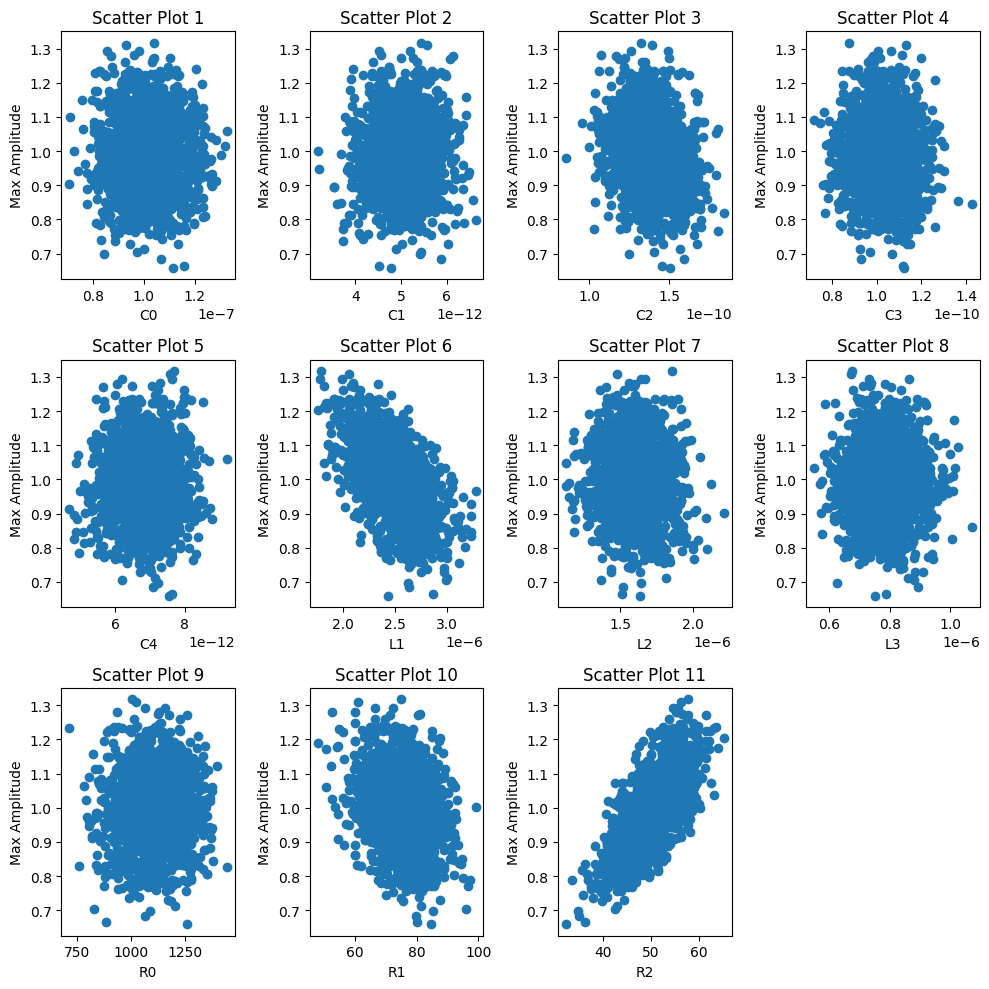

In [5]:
# Plotar 11 graficos com coordenadas y1 e elementos de Cval, dispensar 2 últimos elementos.



fig, axs = plt.subplots(3, 4, figsize=(10, 10))

# Plot scatter plot 1
axs[0, 0].scatter(x_coords1, y_coords1)
axs[0, 0].set_title('Scatter Plot 1')
axs[0, 0].set_xlabel('C0')
axs[0, 0].set_ylabel('Max Amplitude')

# Plot scatter plot 2
axs[0, 1].scatter(x_coords2, y_coords1)
axs[0, 1].set_title('Scatter Plot 2')
axs[0, 1].set_xlabel('C1')
axs[0, 1].set_ylabel('Max Amplitude')

# Plot scatter plot 3
axs[0, 2].scatter(x_coords3, y_coords1)
axs[0, 2].set_title('Scatter Plot 3')
axs[0, 2].set_xlabel('C2')
axs[0, 2].set_ylabel('Max Amplitude')


# Plot scatter plot 4
axs[0, 3].scatter(x_coords4, y_coords1)
axs[0, 3].set_title('Scatter Plot 4')
axs[0, 3].set_xlabel('C3')
axs[0, 3].set_ylabel('Max Amplitude')

# Plot scatter plot 5
axs[1, 0].scatter(x_coords5, y_coords1)
axs[1, 0].set_title('Scatter Plot 5')
axs[1, 0].set_xlabel('C4')
axs[1, 0].set_ylabel('Max Amplitude')

# Plot scatter plot 6
axs[1, 1].scatter(x_coords6, y_coords1)
axs[1, 1].set_title('Scatter Plot 6')
axs[1, 1].set_xlabel('L1')
axs[1, 1].set_ylabel('Max Amplitude')

# Plot scatter plot 7
axs[1, 2].scatter(x_coords7, y_coords1)
axs[1, 2].set_title('Scatter Plot 7')
axs[1, 2].set_xlabel('L2')
axs[1, 2].set_ylabel('Max Amplitude')

# Plot scatter plot 8
axs[1, 3].scatter(x_coords8, y_coords1)
axs[1, 3].set_title('Scatter Plot 8')
axs[1, 3].set_xlabel('L3')
axs[1, 3].set_ylabel('Max Amplitude')

# Plot scatter plot 9
axs[2, 0].scatter(x_coords9, y_coords1)
axs[2, 0].set_title('Scatter Plot 9')
axs[2, 0].set_xlabel('R0')
axs[2, 0].set_ylabel('Max Amplitude')

# Plot scatter plot 10
axs[2, 1].scatter(x_coords10, y_coords1)
axs[2, 1].set_title('Scatter Plot 10')
axs[2, 1].set_xlabel('R1')
axs[2, 1].set_ylabel('Max Amplitude')

# Plot scatter plot 11
axs[2, 2].scatter(x_coords11, y_coords1)
axs[2, 2].set_title('Scatter Plot 11')
axs[2, 2].set_xlabel('R2')
axs[2, 2].set_ylabel('Max Amplitude')

axs[2, 3].axis('off')

plt.tight_layout()


plt.show()

In [6]:
# Correlação de Pearson para cada um dos 11 elementos a máxima Amplitude.
corr_coefficient, p_value = pearsonr(x_coords1, y_coords1)
print(f"Pearson correlation coefficient for plot 1: {corr_coefficient}")
print(f"P-Value for plot 1: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords2, y_coords1)
print(f"Pearson correlation coefficient for plot 2: {corr_coefficient}")
print(f"P-Value for plot 2: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords3, y_coords1)
print(f"Pearson correlation coefficient for plot 3: {corr_coefficient}")
print(f"P-Value for plot 3: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords4, y_coords1)
print(f"Pearson correlation coefficient for plot 4: {corr_coefficient}")
print(f"P-Value for plot 4: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords5, y_coords1)
print(f"Pearson correlation coefficient for plot 5: {corr_coefficient}")
print(f"P-Value for plot 5: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords6, y_coords1)
print(f"Pearson correlation coefficient for plot 6: {corr_coefficient}")
print(f"P-Value for plot 6: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords7, y_coords1)
print(f"Pearson correlation coefficient for plot 7: {corr_coefficient}")
print(f"P-Value for plot 7: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords8, y_coords1)
print(f"Pearson correlation coefficient for plot 8: {corr_coefficient}")
print(f"P-Value for plot 8: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords9, y_coords1)
print(f"Pearson correlation coefficient for plot 9: {corr_coefficient}")
print(f"P-Value for plot 9: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords10, y_coords1)
print(f"Pearson correlation coefficient for plot 10: {corr_coefficient}")
print(f"P-Value for plot 10: {p_value}")

corr_coefficient, p_value = pearsonr(x_coords11, y_coords1)
print(f"Pearson correlation coefficient for plot 11: {corr_coefficient}")
print(f"P-Value for plot 11: {p_value}")

Pearson correlation coefficient for plot 1: -0.045342439137685556
P-Value for plot 1: 0.07916629316841618
Pearson correlation coefficient for plot 2: 0.026167317184340184
P-Value for plot 2: 0.3111631626809599
Pearson correlation coefficient for plot 3: -0.22108307605447575
P-Value for plot 3: 4.603855338686242e-18
Pearson correlation coefficient for plot 4: -0.036858863517955316
P-Value for plot 4: 0.1536282071912352
Pearson correlation coefficient for plot 5: 0.04923694300468865
P-Value for plot 5: 0.05658468725640576
Pearson correlation coefficient for plot 6: -0.5727002802495965
P-Value for plot 6: 1.8287048356349132e-131
Pearson correlation coefficient for plot 7: -0.08506851637788443
P-Value for plot 7: 0.0009740308415457894
Pearson correlation coefficient for plot 8: 0.011720968288308787
P-Value for plot 8: 0.6501251817703612
Pearson correlation coefficient for plot 9: 0.0327372525891053
P-Value for plot 9: 0.20508700622870932
Pearson correlation coefficient for plot 10: -0.2714

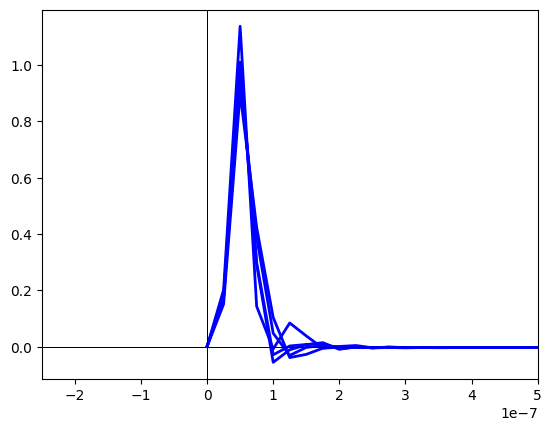

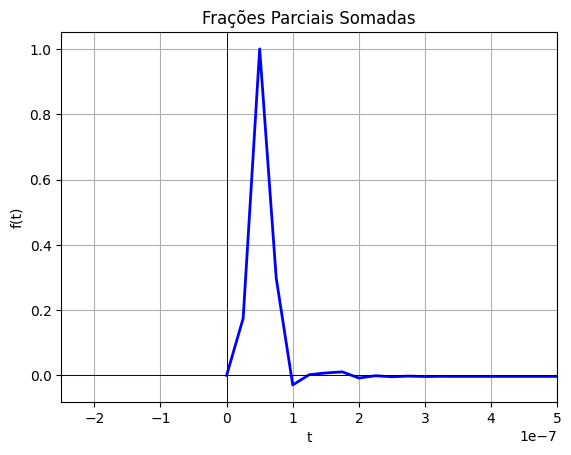

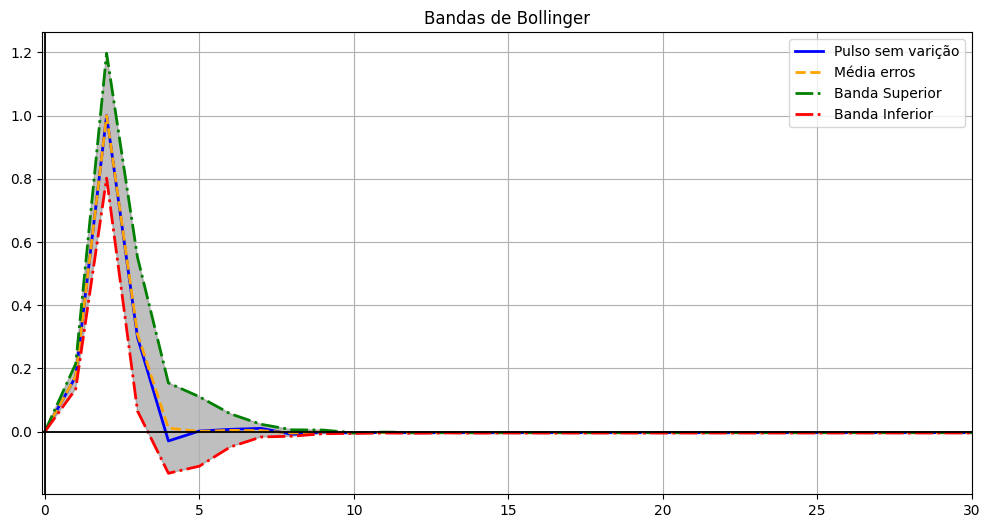

In [4]:
# media da lista
ymed = []
ymed = [sum(item) / len(item) for item in zip(*y)] # nao normalizar

# Calculando o desvio padrão
desv_pad = []
desv_pad = np.std(y, axis=0)

# Plot Sinal sem erro normalizado
for i in range(0,vezes):
  plt.plot(t1,y[i], color= 'b', linewidth = 2)
  plt.xlim(-0.25*10**-6, 0.5*10**-6)
  plt.axhline(0, color='black', linewidth=0.65)
  plt.axvline(0, color='black', linewidth=0.65)

plt.show()

# Plotar o gráfico
plt.plot(t1, y[0], color= 'b', linewidth = 2) #, label='y = x^2') linewidth = expessura
plt.xlabel('t') # titulo eixo x
plt.ylabel('f(t)') # titulo eixo y
plt.title('Frações Parciais Somadas') # titulo Grafico
plt.grid(True) # fundo do grafico com grade
plt.xlim(-0.25*10**-6, 0.5*10**-6)  # Limites do eixo x
plt.axhline(0, color='black', linewidth=0.65)
plt.axvline(0, color='black', linewidth=0.65)
plt.show()


# Plotagem

banda_sup = ymed + desv_pad*2.5
banda_inf = ymed - desv_pad*2.5

plt.figure(figsize=(12, 6))

# Sinais
plt.plot( y[0], label='Pulso sem varição',linestyle='-',color = 'b' ,linewidth=2)
plt.plot( ymed, label='Média erros', linestyle='--', color = 'orange', linewidth=2)
plt.plot( banda_sup, label='Banda Superior', linestyle='-.',color = 'g', linewidth=2)
plt.plot( banda_inf, label='Banda Inferior', linestyle='-.',color = 'r', linewidth=2)

# Sombrear a área entre a banda_sup e a banda_inf
plt.fill_between(range(len(banda_sup)), banda_sup, banda_inf, color='gray', alpha=0.5)

# Eixos
w = 1.3
plt.axhline(0, color='black', linewidth=w)
plt.axvline(0, color='black', linewidth=w)

plt.title("Bandas de Bollinger")
plt.xlim(-0.1, 30)
plt.legend()
plt.grid(True)
plt.show()


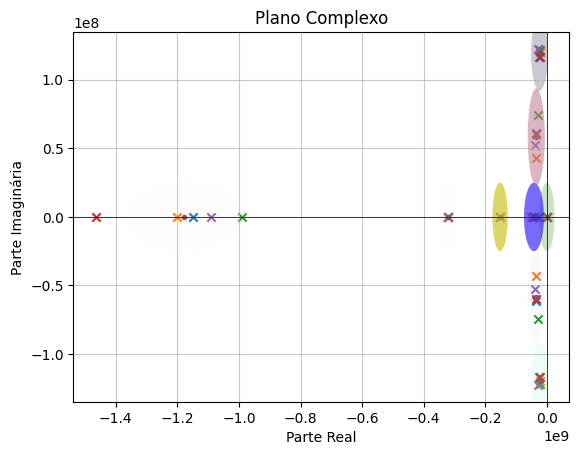

In [5]:
# mapa de polos
fig, ax = plt.subplots()

real_pt = np.zeros(shape=(vezes,9))
imag_pt = np.zeros(shape=(vezes,9))
for j,i in enumerate(tds_polos):
    # Separar parte real e parte imaginária
    real_part = np.real(i)
    imag_part = np.imag(i)
    real_pt[j] += real_part
    imag_pt[j] += imag_part
    plt.scatter(real_part, imag_part, marker='x')

    # gráfico

mx = np.mean(real_pt, axis=0)
lx = np.std(real_pt, axis=0)

my = np.mean(imag_pt, axis=0)
ly = np.std(imag_pt, axis=0)

plt.scatter(mx,my,marker='.')

ells = [Ellipse(xy=np.array([mx[i],my[i]]),
                width=2*lx[i]+5e7, height=2*ly[i]+5e7,
                angle=0 * 360)
        for i in range(9)]
#display(np.random.rand(2) * 10)
#display(np.array([mx,my]))

#fig, ax = plt.subplots()
#ax.set(xlim=(-1.2e9, 1e5), ylim=(-0.25e9, 0.25e9), aspect="equal")

for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

# eixos
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# titulo
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title ('Plano Complexo')

# Grade
plt.grid(True, linestyle='-', alpha=0.7)

plt.show() # mapa de polos

In [6]:
display(ly)

array([       0.        ,        0.        , 10316793.68311025,
       10316793.68311025,  2473523.58456   ,  2473523.58456   ,
              0.        ,        0.        ,        0.        ])